In [3]:
! pip install matplotlib seaborn statsmodels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.drop(columns=["Unnamed: 0","Booking_ID"],inplace=True)

In [7]:
df.shape

(29020, 18)

In [8]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21359, 18)

In [12]:
cat_col = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest',
    'booking_status'
]

In [13]:
num_col = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col]= {label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [17]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [18]:
##Multicolinarity

In [19]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = add_constant(df)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                features           VIF
0                                  const  4.100197e+07
1                           no_of_adults  1.341180e+00
2                         no_of_children  1.282459e+00
3                   no_of_weekend_nights  1.073215e+00
4                      no_of_week_nights  1.125260e+00
5                      type_of_meal_plan  1.178228e+00
6             required_car_parking_space  1.036105e+00
7                     room_type_reserved  1.549859e+00
8                              lead_time  1.406287e+00
9                           arrival_year  1.288533e+00
10                         arrival_month  1.248028e+00
11                          arrival_date  1.003605e+00
12                   market_segment_type  1.704297e+00
13                        repeated_guest  1.765576e+00
14          no_of_previous_cancellations  1.396559e+00
15  no_of_previous_bookings_not_canceled  1.712854e+00
16                    avg_price_per_room  1.926372e+00
17        

In [20]:
corr = df.corr()

In [21]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

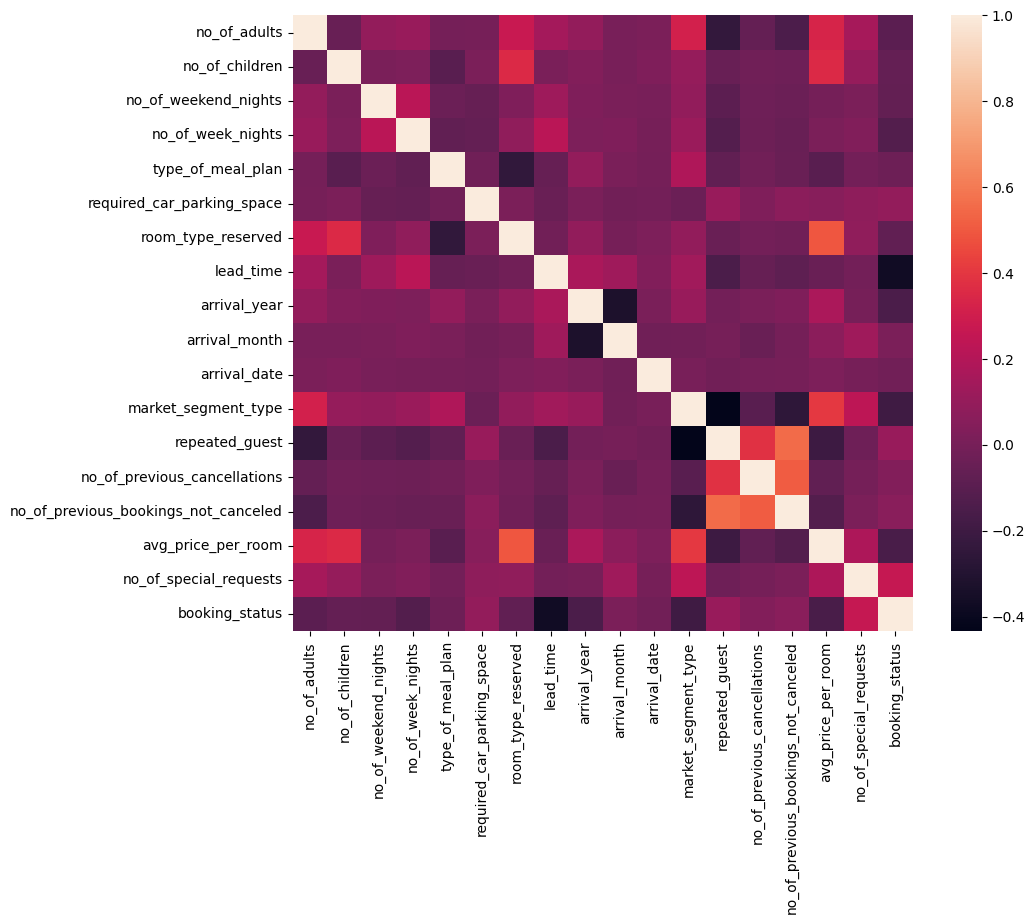

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [23]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [24]:
for col in df.columns:
    if skewness[col]>5:
        df[col] = np.log1p(df[col])

In [25]:
df[col]

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int64

In [26]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [27]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [28]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [29]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0


In [30]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int64

In [31]:
!pip install imbalanced-learn

In [32]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X,y)

In [35]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [36]:
balanced_df = pd.DataFrame(x_res,columns=X.columns)
balanced_df['booking_status'] = y_res

In [37]:
balanced_df.shape

(30462, 18)

In [38]:
df = balanced_df.copy()

In [39]:
df.shape

(30462, 18)

In [40]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [42]:
model.feature_importances_

array([0.01787932, 0.00689339, 0.03064883, 0.04509214, 0.02058198,
       0.01172466, 0.0196189 , 0.25993956, 0.01669947, 0.08711921,
       0.08457067, 0.05580458, 0.00637714, 0.00032694, 0.00284207,
       0.15076301, 0.18311812])

In [43]:
feature_importance = model.feature_importances_

In [44]:
feature_importance_df = pd.DataFrame(
    {'feature': X.columns,
    'importance': feature_importance
})

In [45]:
top_features = feature_importance_df.sort_values(by='importance',ascending=False)

In [46]:
top_10_features = top_features['feature'].head(10).values
# top_10_df = df

In [47]:
top_10_df = df[top_10_features.tolist()+ ['booking_status']]

In [48]:
top_10_df.shape

(30462, 11)

In [49]:
df = top_10_df.copy()

In [50]:
!pip install xgboost lightgbm

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [52]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [54]:
classifiers = {
    'Random forest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'Graient Boosting' : GradientBoostingClassifier(random_state=42),
    'Support vector classifier': SVC(random_state=42),
    'Decision tree' : DecisionTreeClassifier(random_state=42),
    'KNN' : KNeighborsClassifier(),
    'Naive bayes': GaussianNB(),
    'XGboost': XGBClassifier(random_state=42),
    'Adaboost': AdaBoostClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42)
}

In [55]:
metrics = {
    'Model' :[],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []

}

In [56]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Recall'].append(recall)
    metrics['F1'].append(f1)
    metrics['Precision'].append(precision)



[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [58]:
metrics_df = pd.DataFrame(metrics)

In [59]:
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,Random forest,0.891515,0.893499,0.890879,0.892187
1,LogisticRegression,0.774003,0.802646,0.731270,0.765297
2,Graient Boosting,0.836862,0.821362,0.864169,0.842222
3,Support vector classifier,0.720827,0.730394,0.706840,0.718424
4,Decision tree,0.832431,0.841842,0.821824,0.831713
5,KNN,0.779747,0.856730,0.675896,0.755645
6,Naive bayes,0.773511,0.803738,0.728339,0.764183
7,XGboost,0.875595,0.870513,0.884691,0.877544
8,Adaboost,0.805186,0.802053,0.814332,0.808146
9,LGBM,0.865419,0.851124,0.888274,0.869302


In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [62]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [63]:
rf = RandomForestClassifier(random_state=42)

In [72]:
params = {
    'n_estimators': randint(100,500) ,
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap' :[True,False],

}

In [73]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params,
                                   n_iter=5,
                                   cv =2,
                                   verbose=2,
                                   random_state=42,
                                   scoring='accuracy')

In [74]:
random_search.fit(X_train,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   1.3s
[CV] END bootstrap=False, max_depth=33, min_samples_leaf=3, min_samples_split=7, n_estimators=408; total time=   4.1s
[CV] END bootstrap=False, max_depth=33, min_samples_leaf=3, min_samples_split=7, n_estimators=408; total time=   3.9s
[C

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169adc500>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169ad8050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169adcb90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169a03750>},
                   random_state=42, scoring='accuracy', verbose=2)

In [75]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [78]:
best_rf_model = random_search.best_estimator_

In [79]:
y_pred  = best_rf_model.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [81]:
accuracy

0.8911866075824717

In [82]:
recall

0.895114006514658

In [83]:
precision

0.8896082874716736

In [84]:
f1

0.8923526546517292

In [85]:
import joblib

joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [86]:
loaded_model = joblib.load("random_forest.pkl")

In [91]:
loaded_model.predict(np.array(X_train[0:1]).reshape(1,-1))

array([1])